In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(style="ticks")

In [5]:
df = pd.read_csv('winequality-red.csv').iloc[:, 1:]
df.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1599 non-null   float64
 1   citric acid           1599 non-null   float64
 2   residual sugar        1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   free sulfur dioxide   1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


In [7]:
df.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


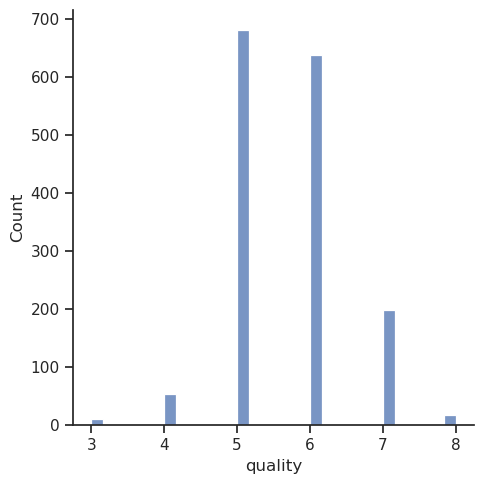

In [8]:
sns.displot(
    data = df, 
    x = 'quality'
)

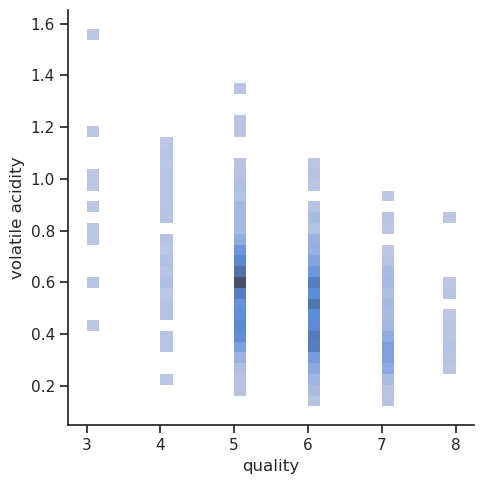

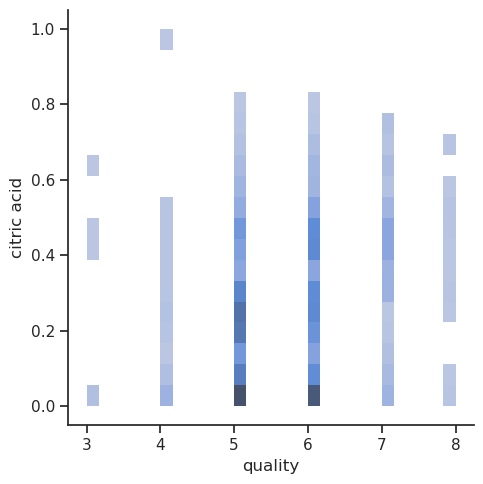

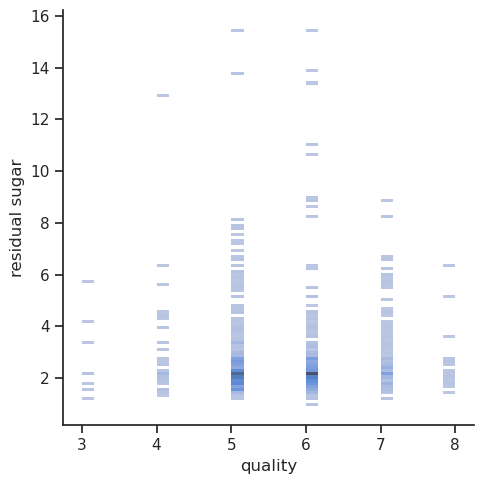

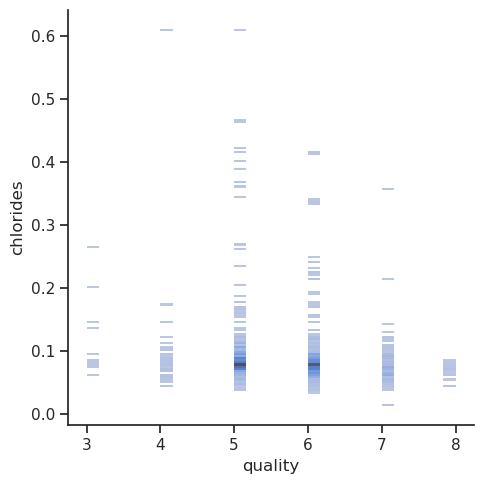

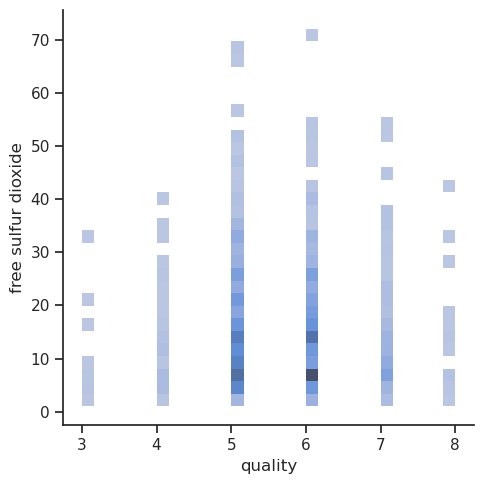

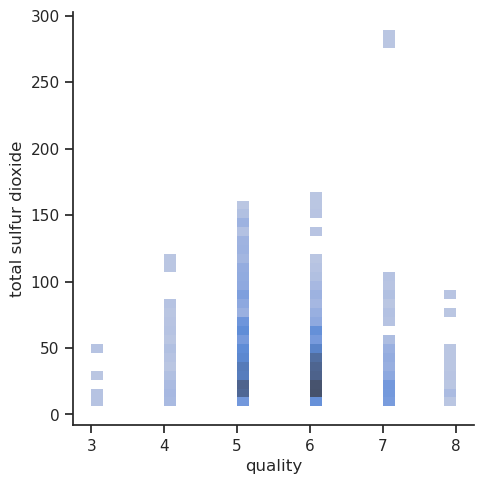

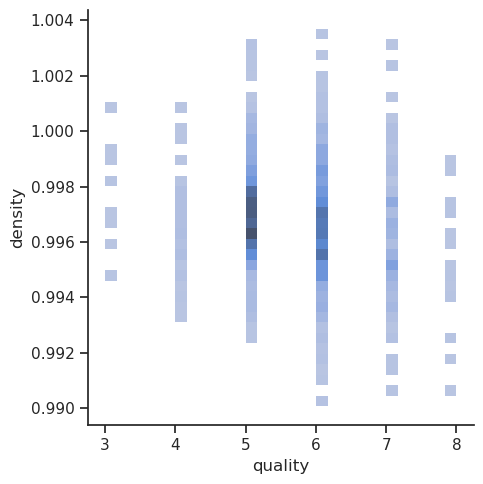

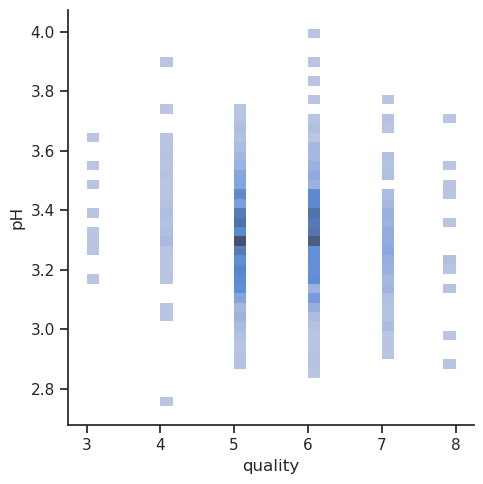

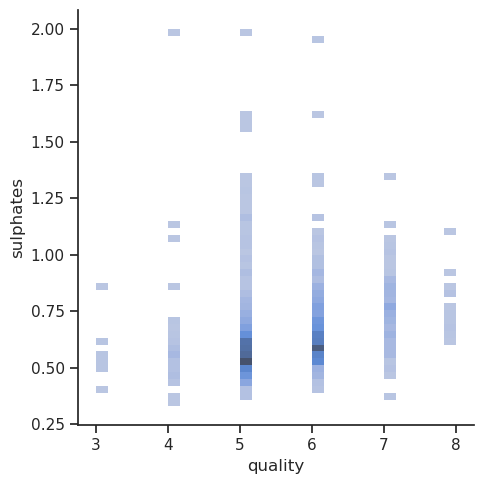

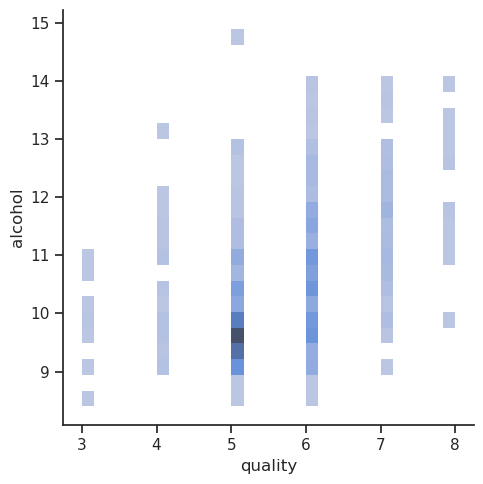

In [9]:
grouped_by_class = df.groupby('quality')

# col ~ feature
for feature in list(df.columns.drop('quality')):  # Начинаем со второго столбца, так как первый - это метка "class"
    sns.displot(
        data = df,
        y = feature,
        x = 'quality'
    )

<Axes: >

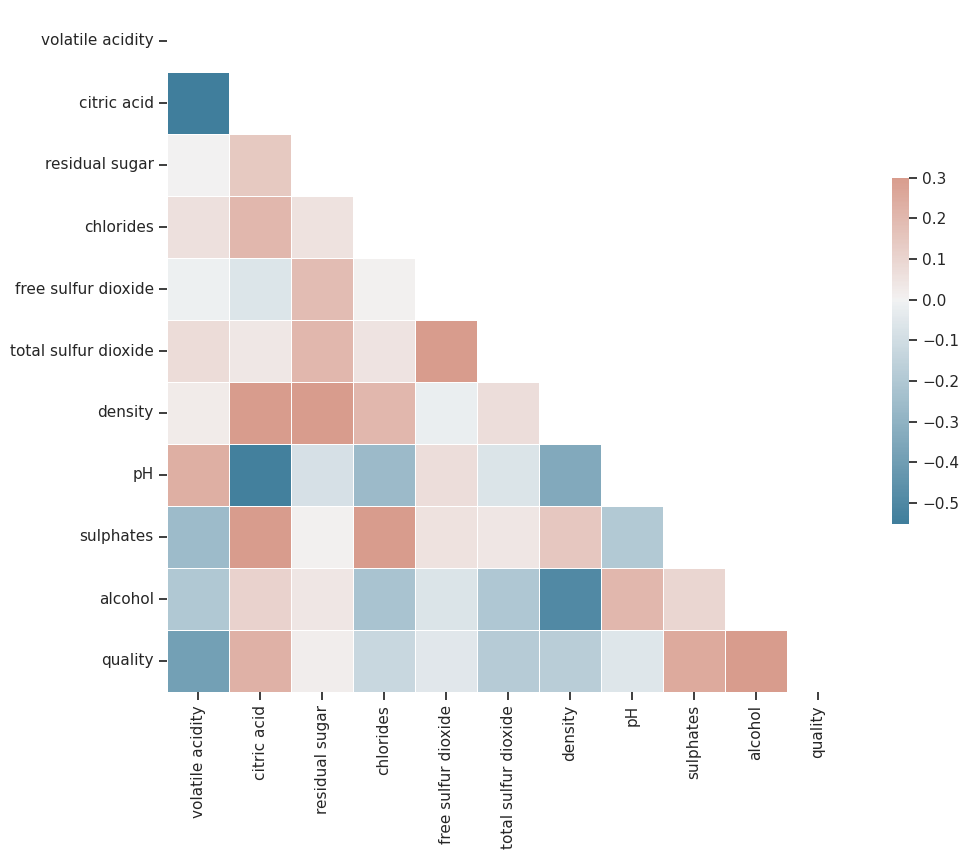

In [10]:
# source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality'], axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

## Task 1

Root Mean Squared Error: 0.75
|--- alcohol <= 10.53
|   |--- volatile acidity <= 0.34
|   |   |--- sulphates <= 0.69
|   |   |   |--- pH <= 3.04
|   |   |   |   |--- value: [7.00]
|   |   |   |--- pH >  3.04
|   |   |   |   |--- chlorides <= 0.10
|   |   |   |   |   |--- citric acid <= 0.24
|   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |--- citric acid >  0.24
|   |   |   |   |   |   |--- pH <= 3.15
|   |   |   |   |   |   |   |--- residual sugar <= 2.15
|   |   |   |   |   |   |   |   |--- value: [6.00]
|   |   |   |   |   |   |   |--- residual sugar >  2.15
|   |   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |--- pH >  3.15
|   |   |   |   |   |   |   |--- density <= 1.00
|   |   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |   |--- density >  1.00
|   |   |   |   |   |   |   |   |--- volatile acidity <= 0.21
|   |   |   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |   |   |--- volatile acidity >  0.2

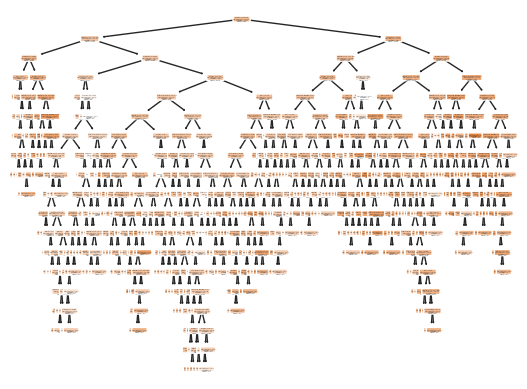

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_regressor = DecisionTreeRegressor(random_state=666)
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

from sklearn.tree import export_text

tree_rules = export_text(dt_regressor, feature_names=df.columns.drop('quality'))
print(tree_rules)

from sklearn.tree import plot_tree
# plt.figure(figsize=(12, 8))
plot_tree(dt_regressor, filled=True, feature_names=df.columns.drop('quality'), rounded=True)
plt.show()


## Task 2

Root Mean Squared Error: 0.6026766646301371


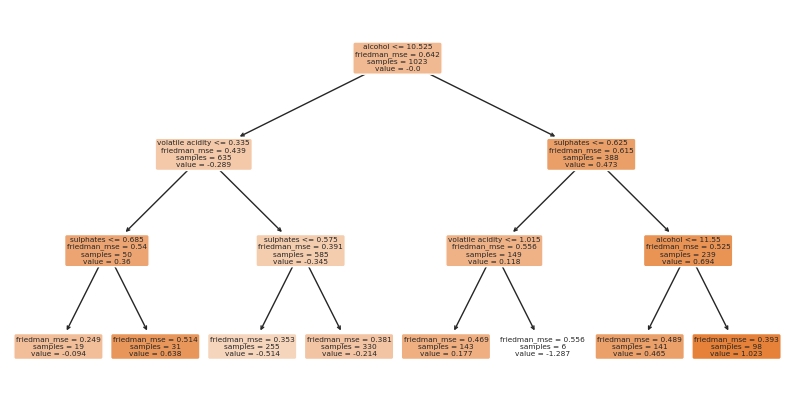

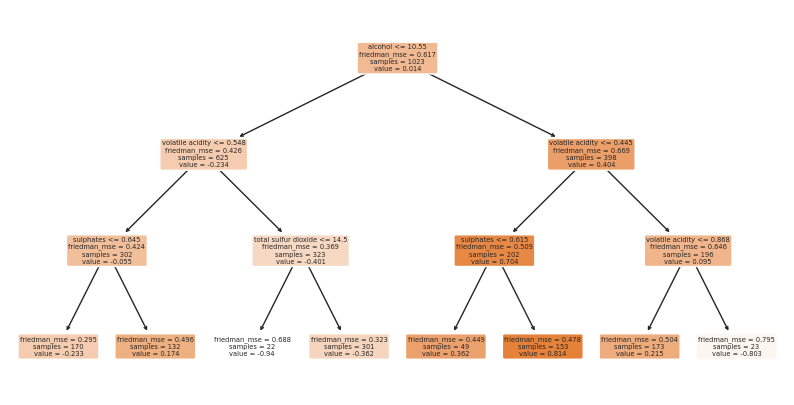

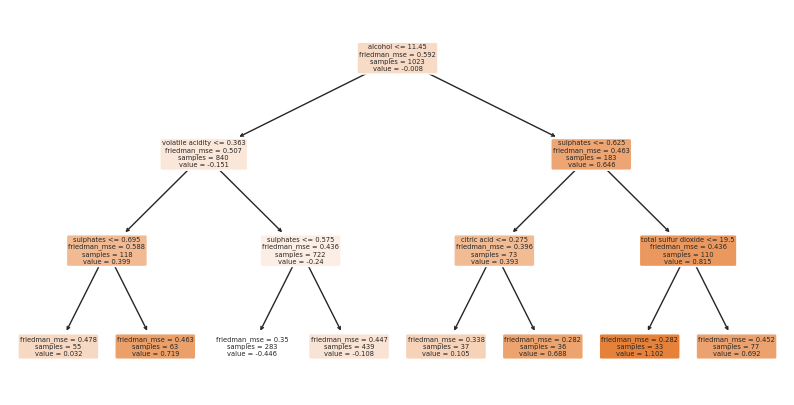

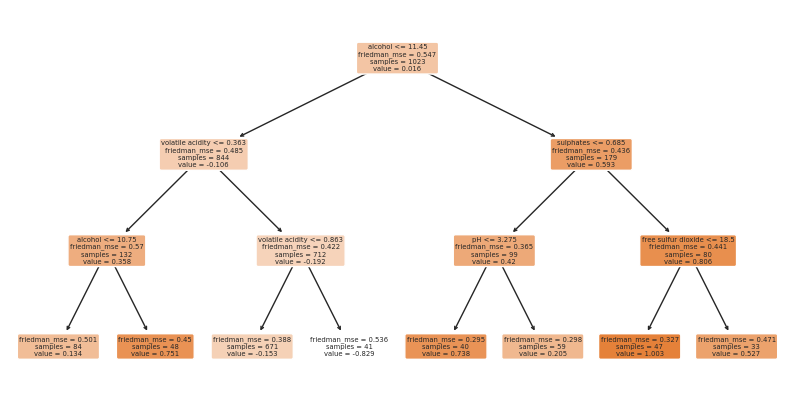

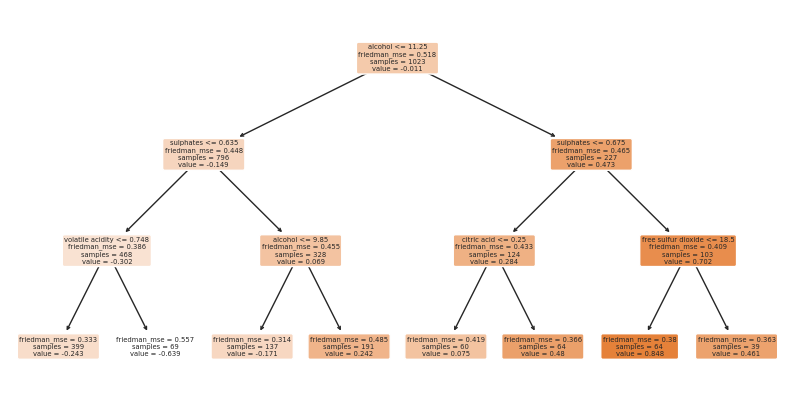

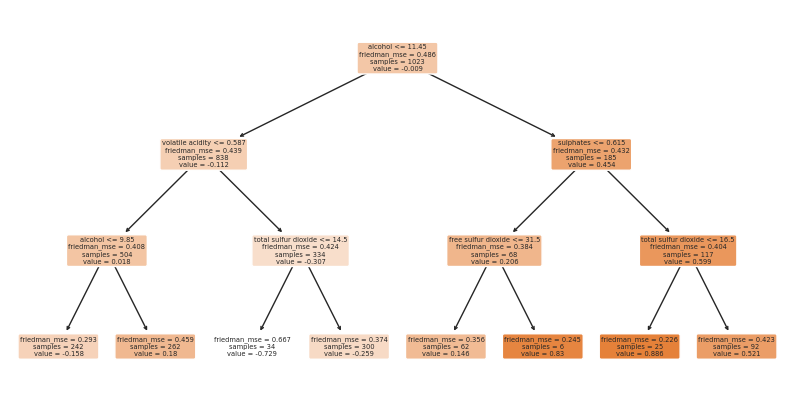

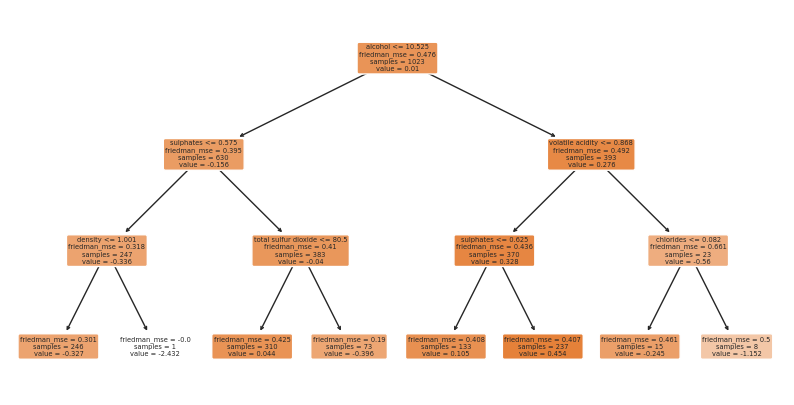

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=666, subsample=0.8)
gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

for i in range(7):
    plt.figure(figsize=(10, 5))
    plt.title(f"Tree {i+1}")
    plot_tree(gb_regressor.estimators_[i][0], filled=True, feature_names=df.columns.drop('quality'), rounded=True)
    plt.show()

In [14]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200, 300, 400],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5]
# }

# grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)

## Task 3

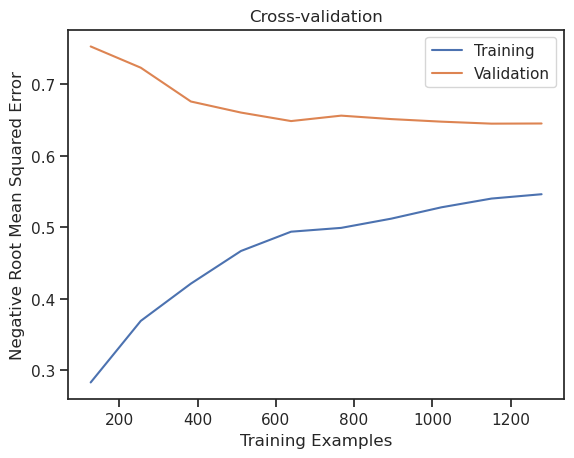

In [15]:
from sklearn.model_selection import learning_curve

gb_regressor = GradientBoostingRegressor(n_estimators=40, learning_rate=0.1, max_depth=3, random_state=666)
train_sizes, train_scores, test_scores = learning_curve(gb_regressor, X, y, random_state=666, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_root_mean_squared_error')

# Визуализация кривых обучения
plt.plot(train_sizes, -np.mean(train_scores, axis=1), label='Training')
plt.plot(train_sizes, -np.mean(test_scores, axis=1), label='Validation')
plt.xlabel('Training Examples')
plt.ylabel('Negative Root Mean Squared Error')
plt.title('Cross-validation')
plt.legend()
plt.show()

In [16]:
cache = dict()
for i in range(2, 10):
    gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=i, random_state=666)
    train_sizes, train_scores, test_scores = learning_curve(gb_regressor, X, y, random_state=666, train_sizes=np.linspace(0.1, 1.0, 6), cv=5, scoring='neg_root_mean_squared_error')
    cache[i] = (train_sizes, train_scores, test_scores)
print('calculated')

calculated


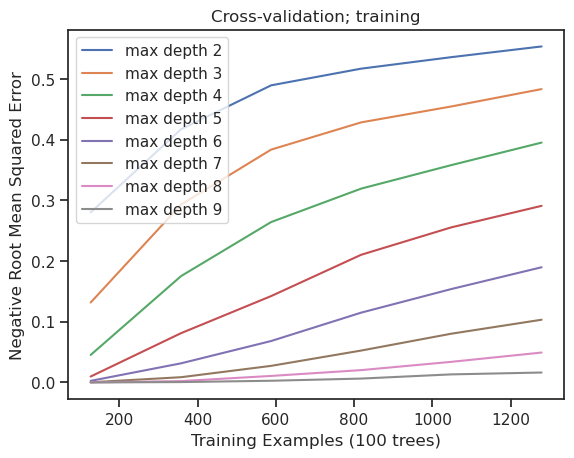

In [17]:
plt.xlabel('Training Examples (100 trees)')
plt.ylabel('Negative Root Mean Squared Error')

for i in range(2, 10):
    train_sizes, train_scores, test_scores = cache[i]
    plt.plot(train_sizes, -np.mean(train_scores, axis=1), label=f'max depth {i}')

plt.title('Cross-validation; training')
plt.legend()
plt.show()

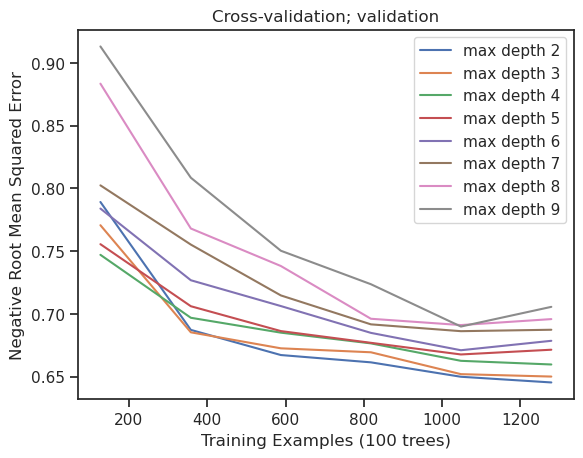

In [18]:
plt.xlabel('Training Examples (100 trees)')
plt.ylabel('Negative Root Mean Squared Error')

for i in range(2, 10):
    train_sizes, train_scores, test_scores = cache[i]
    plt.plot(train_sizes, -np.mean(test_scores, axis=1), label=f'max depth {i}')

plt.title('Cross-validation; validation')
plt.legend()
plt.show()

## Task 4

In [19]:
cache = dict()
for i in range(10, 220+1, 30):
    gb_regressor = GradientBoostingRegressor(n_estimators=i, learning_rate=0.1, max_depth=3, random_state=666)
    train_sizes, train_scores, test_scores = learning_curve(gb_regressor, X, y, random_state=666, train_sizes=np.linspace(0.1, 1.0, 6), cv=5, scoring='neg_root_mean_squared_error')
    cache[i] = (train_sizes, train_scores, test_scores)
print('calculated')

calculated


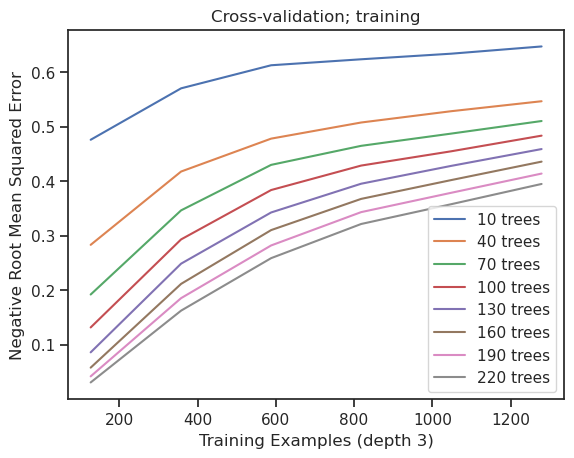

In [20]:
plt.xlabel('Training Examples (depth 3)')
plt.ylabel('Negative Root Mean Squared Error')

for i in range(10, 220+1, 30):
    train_sizes, train_scores, test_scores = cache[i]
    plt.plot(train_sizes, -np.mean(train_scores, axis=1), label=f'{i} trees')

plt.title('Cross-validation; training')
plt.legend()
plt.show()


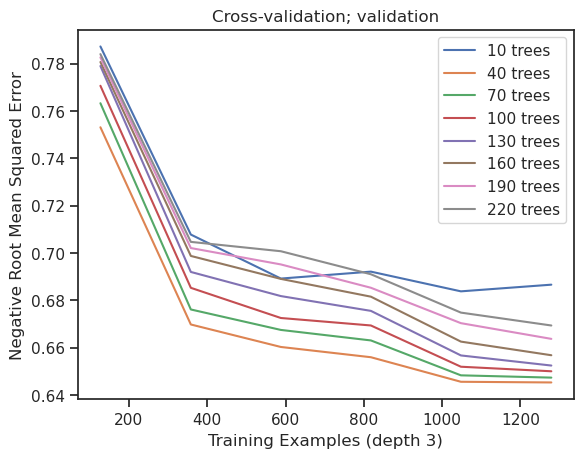

In [21]:
plt.xlabel('Training Examples (depth 3)')
plt.ylabel('Negative Root Mean Squared Error')

for i in range(10, 220+1, 30):
    train_sizes, train_scores, test_scores = cache[i]
    plt.plot(train_sizes, -np.mean(test_scores, axis=1), label=f'{i} trees')

plt.title('Cross-validation; validation')
plt.legend()
plt.show()

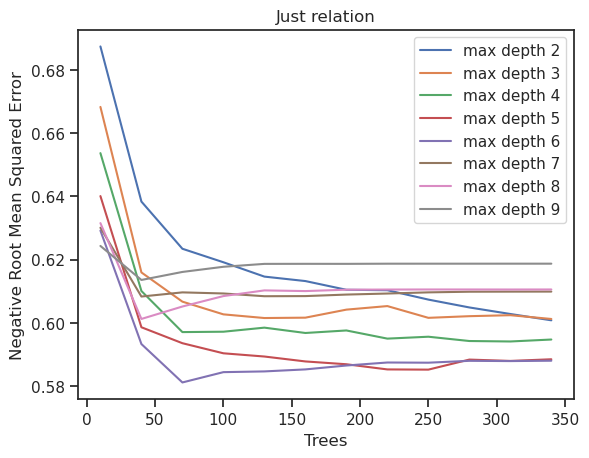

In [22]:
plt.xlabel('Trees')
plt.ylabel('Negative Root Mean Squared Error')

estimators_n_amounts = range(10, 340+1, 30)
depth_amounts = range(2, 10)

for depth in depth_amounts:
    def rel(n):
        gb_regressor = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=depth, random_state=666, subsample=0.8)
        gb_regressor.fit(X_train, y_train)

        y_pred = gb_regressor.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        return rmse
    
    plt.plot(estimators_n_amounts, list(map(rel, estimators_n_amounts)), label=f'max depth {depth}')        

plt.title('Just relation')
plt.legend()
plt.show()

## Task 5

In [23]:
from sklearn.ensemble import RandomForestRegressor

cache = dict()
for i in range(10, 220+1, 30):
    rf_regressor = RandomForestRegressor(n_estimators=i, max_depth=3, random_state=666)
    train_sizes, train_scores, test_scores = learning_curve(rf_regressor, X, y, random_state=666, train_sizes=np.linspace(0.1, 1.0, 6), cv=5, scoring='neg_root_mean_squared_error')
    cache[i] = (train_sizes, train_scores, test_scores)
print('calculated')

calculated


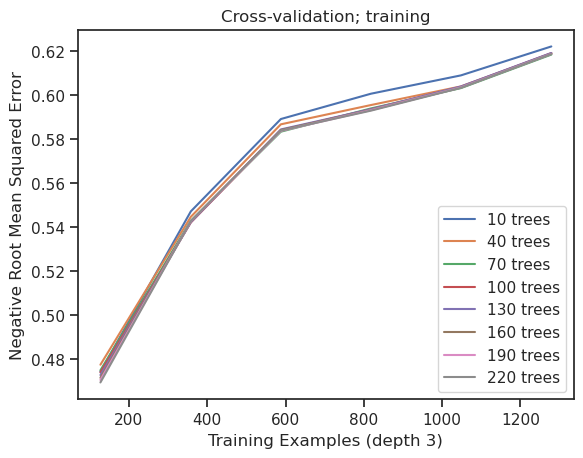

In [24]:
plt.xlabel('Training Examples (depth 3)')
plt.ylabel('Negative Root Mean Squared Error')

for i in range(10, 220+1, 30):
    train_sizes, train_scores, test_scores = cache[i]
    plt.plot(train_sizes, -np.mean(train_scores, axis=1), label=f'{i} trees')

plt.title('Cross-validation; training')
plt.legend()
plt.show()


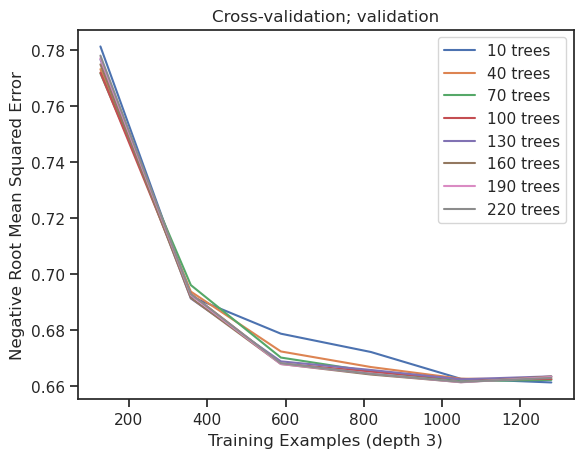

In [25]:
plt.xlabel('Training Examples (depth 3)')
plt.ylabel('Negative Root Mean Squared Error')

for i in range(10, 220+1, 30):
    train_sizes, train_scores, test_scores = cache[i]
    plt.plot(train_sizes, -np.mean(test_scores, axis=1), label=f'{i} trees')

plt.title('Cross-validation; validation')
plt.legend()
plt.show()

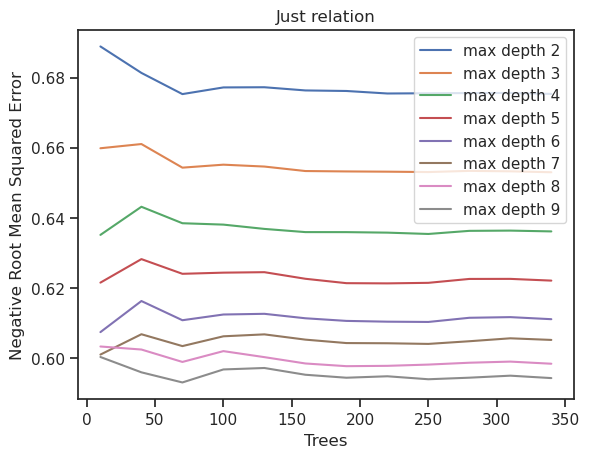

In [26]:
plt.xlabel('Trees')
plt.ylabel('Negative Root Mean Squared Error')

estimators_n_amounts = range(10, 340+1, 30)
depth_amounts = range(2, 10)

for depth in depth_amounts:
    def rel(n):
        rf_regressor = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=666)
        rf_regressor.fit(X_train, y_train)

        y_pred = rf_regressor.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        return rmse
    
    plt.plot(estimators_n_amounts, list(map(rel, estimators_n_amounts)), label=f'max depth {depth}')        

plt.title('Just relation')
plt.legend()
plt.show()